Data joining in Pandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
student_info = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'name': ['John', 'Jane', 'Joe', 'Mary', 'Peter', 'Paul', 'Jill', 'Jack', 'Jen', 'Jenny', 'Jesse', 'Jasmine'],
    'student_subject': ['Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math'],
})

In [6]:
student_results = pd.DataFrame({ 
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'student_marks': [90, 80, 70, 60, 50, 65, 75, 72, 59, 20],
    'student_result': ['Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail'],
})

In [7]:
student_info

,student_id,name,student_subject
0,1,John,Math
1,2,Jane,Math
2,3,Joe,Math
3,4,Mary,Math
4,5,Peter,Math
5,6,Paul,Math
6,7,Jill,Math
7,8,Jack,Math
8,9,Jen,Math
9,10,Jenny,Math


In [8]:
student_results

,student_id,student_marks,student_result
0,1,90,Pass
1,2,80,Pass
2,3,70,Pass
3,4,60,Pass
4,5,50,Fail
5,6,65,Pass
6,7,75,Pass
7,8,72,Pass
8,9,59,Fail
9,10,20,Fail


In [9]:
InnerJoin = student_info.merge(student_results, on='student_id', how='inner', suffixes=('_info', '_results'))
InnerJoin.head(10)

,student_id,name,student_subject,student_marks,student_result
0,1,John,Math,90,Pass
1,2,Jane,Math,80,Pass
2,3,Joe,Math,70,Pass
3,4,Mary,Math,60,Pass
4,5,Peter,Math,50,Fail
5,6,Paul,Math,65,Pass
6,7,Jill,Math,75,Pass
7,8,Jack,Math,72,Pass
8,9,Jen,Math,59,Fail
9,10,Jenny,Math,20,Fail


In [10]:
InnerJoin = student_info.merge(student_results, on='student_id', how='inner', suffixes=('_info', '_results'))
InnerJoin.loc[InnerJoin['student_result'] == 'Pass',['name','student_marks','student_result']]

,name,student_marks,student_result
0,John,90,Pass
1,Jane,80,Pass
2,Joe,70,Pass
3,Mary,60,Pass
5,Paul,65,Pass
6,Jill,75,Pass
7,Jack,72,Pass


In [11]:
student_info.merge(student_results, on='student_id')

,student_id,name,student_subject,student_marks,student_result
0,1,John,Math,90,Pass
1,2,Jane,Math,80,Pass
2,3,Joe,Math,70,Pass
3,4,Mary,Math,60,Pass
4,5,Peter,Math,50,Fail
5,6,Paul,Math,65,Pass
6,7,Jill,Math,75,Pass
7,8,Jack,Math,72,Pass
8,9,Jen,Math,59,Fail
9,10,Jenny,Math,20,Fail


<AxesSubplot:xlabel='student_id'>

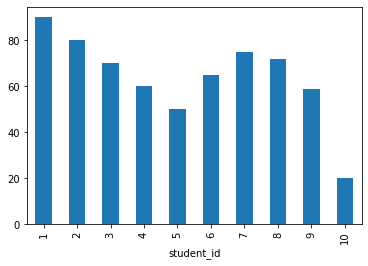

In [12]:
InnerJoin.groupby('student_id')['student_marks'].sum().plot(kind='bar')

In [13]:
student_address = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    'address': ['1 Main Street', '2 Main Street', '3 Main Street', '4 Main Street', '5 Main Street', '6 Main Street', '7 Main Street', '8 Main Street', '9 Main Street', '10 Main Street', '11 Main Street', '12 Main Street', '13 Main Street'],
})

In [14]:
student_info.merge(student_address, on='student_id') \
    .merge(student_results, on='student_id') 

,student_id,name,student_subject,address,student_marks,student_result
0,1,John,Math,1 Main Street,90,Pass
1,2,Jane,Math,2 Main Street,80,Pass
2,3,Joe,Math,3 Main Street,70,Pass
3,4,Mary,Math,4 Main Street,60,Pass
4,5,Peter,Math,5 Main Street,50,Fail
5,6,Paul,Math,6 Main Street,65,Pass
6,7,Jill,Math,7 Main Street,75,Pass
7,8,Jack,Math,8 Main Street,72,Pass
8,9,Jen,Math,9 Main Street,59,Fail
9,10,Jenny,Math,10 Main Street,20,Fail


**Left Join**

In [15]:
student_info.merge(student_address, on='student_id', how='outer') 


,student_id,name,student_subject,address
0,1,John,Math,1 Main Street
1,2,Jane,Math,2 Main Street
2,3,Joe,Math,3 Main Street
3,4,Mary,Math,4 Main Street
4,5,Peter,Math,5 Main Street
5,6,Paul,Math,6 Main Street
6,7,Jill,Math,7 Main Street
7,8,Jack,Math,8 Main Street
8,9,Jen,Math,9 Main Street
9,10,Jenny,Math,10 Main Street


In [16]:
data1 = student_info.set_index('student_id')
data1

,name,student_subject
student_id,,
1,John,Math
2,Jane,Math
3,Joe,Math
4,Mary,Math
5,Peter,Math
6,Paul,Math
7,Jill,Math
8,Jack,Math
9,Jen,Math


In [17]:
data1.merge(student_results, on='student_id', how='inner')

,student_id,name,student_subject,student_marks,student_result
0,1,John,Math,90,Pass
1,2,Jane,Math,80,Pass
2,3,Joe,Math,70,Pass
3,4,Mary,Math,60,Pass
4,5,Peter,Math,50,Fail
5,6,Paul,Math,65,Pass
6,7,Jill,Math,75,Pass
7,8,Jack,Math,72,Pass
8,9,Jen,Math,59,Fail
9,10,Jenny,Math,20,Fail


# Semi Join
Returns the intersection,similar to an inner join
Returns only columns from the left table and not the right
No duplicates

In [18]:
semi_join = student_info.merge(student_results, on='student_id')
semijoin_step2 = student_info[student_info['student_id'].isin(semi_join['student_id'])]
semijoin_step2.head(13)

,student_id,name,student_subject
0,1,John,Math
1,2,Jane,Math
2,3,Joe,Math
3,4,Mary,Math
4,5,Peter,Math
5,6,Paul,Math
6,7,Jill,Math
7,8,Jack,Math
8,9,Jen,Math
9,10,Jenny,Math


# Anti Join

Returns the left table,excluding the intersection   
Returns only columns from the left table and not the right


In [19]:
semi_join = student_info.merge(student_results, on='student_id',how='left', indicator=True)
semiJoin_step1 = semi_join.loc[semi_join['_merge'] == 'left_only','student_id']
semijoin_step2 = student_info[student_info['student_id'].isin(semiJoin_step1)]
semijoin_step2.head(13)

,student_id,name,student_subject
10,11,Jesse,Math
11,12,Jasmine,Math


# Cancatenate Two Tables Vertically

In [20]:
pd.concat([student_info, student_results],ignore_index=False, keys =['Studend Information','Student Results'] ,axis=0)

student_id     name student_subject  student_marks  \
Studend Information 0            1     John            Math            NaN   
                    1            2     Jane            Math            NaN   
                    2            3      Joe            Math            NaN   
                    3            4     Mary            Math            NaN   
                    4            5    Peter            Math            NaN   
                    5            6     Paul            Math            NaN   
                    6            7     Jill            Math            NaN   
                    7            8     Jack            Math            NaN   
                    8            9      Jen            Math            NaN   
                    9           10    Jenny            Math            NaN   
                    10          11    Jesse            Math            NaN   
                    11          12  Jasmine            Math            NaN   
Student Results     0            1      NaN             NaN           90.0   
                    1            2      NaN             NaN           80.0   
                    2            3      NaN             NaN           70.0   
                    3            4      NaN             NaN           60.0   
                    4            5      NaN             NaN           50.0   
                    5            6      NaN             NaN           65.0   
                    6            7      NaN             NaN           75.0   
                    7            8      NaN             NaN           72.0   
                    8            9      NaN             NaN           59.0   
                    9           10      NaN             NaN           20.0   

                       student_result  
Studend Information 0             NaN  
                    1             NaN  
                    2             NaN  
                    3             NaN  
                    4             NaN  
                    5             NaN  
                    6             NaN  
                    7             NaN  
                    8             NaN  
                    9             NaN  
                    10            NaN  
                    11            NaN  
Student Results     0            Pass  
                    1            Pass  
                    2            Pass  
                    3            Pass  
                    4            Fail  
                    5            Pass  
                    6            Pass  
                    7            Pass  
                    8            Fail  
                    9            Fail

In [21]:
pd.concat([student_info, student_results],join='inner', axis=0)

,student_id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [22]:
student_address.append([student_info, student_results],ignore_index=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18596\413851730.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  student_address.append([student_info, student_results],ignore_index=False)


,student_id,address,name,student_subject,student_marks,student_result
0,1,1 Main Street,NaN,NaN,NaN,NaN
1,2,2 Main Street,NaN,NaN,NaN,NaN
2,3,3 Main Street,NaN,NaN,NaN,NaN
3,4,4 Main Street,NaN,NaN,NaN,NaN
4,5,5 Main Street,NaN,NaN,NaN,NaN
5,6,6 Main Street,NaN,NaN,NaN,NaN
6,7,7 Main Street,NaN,NaN,NaN,NaN
7,8,8 Main Street,NaN,NaN,NaN,NaN
8,9,9 Main Street,NaN,NaN,NaN,NaN
9,10,10 Main Street,NaN,NaN,NaN,NaN


In [23]:
student_info.merge(student_results, on='student_id',validate='one_to_many')

,student_id,name,student_subject,student_marks,student_result
0,1,John,Math,90,Pass
1,2,Jane,Math,80,Pass
2,3,Joe,Math,70,Pass
3,4,Mary,Math,60,Pass
4,5,Peter,Math,50,Fail
5,6,Paul,Math,65,Pass
6,7,Jill,Math,75,Pass
7,8,Jack,Math,72,Pass
8,9,Jen,Math,59,Fail
9,10,Jenny,Math,20,Fail


**Chapter 4**

In [24]:
pd.merge_ordered(student_info, student_results, on='student_id',fill_method='ffill')

,student_id,name,student_subject,student_marks,student_result
0,1,John,Math,90,Pass
1,2,Jane,Math,80,Pass
2,3,Joe,Math,70,Pass
3,4,Mary,Math,60,Pass
4,5,Peter,Math,50,Fail
5,6,Paul,Math,65,Pass
6,7,Jill,Math,75,Pass
7,8,Jack,Math,72,Pass
8,9,Jen,Math,59,Fail
9,10,Jenny,Math,20,Fail


In [25]:
pd.merge_asof(student_info, student_results, on='student_id',direction='nearest')

,student_id,name,student_subject,student_marks,student_result
0,1,John,Math,90,Pass
1,2,Jane,Math,80,Pass
2,3,Joe,Math,70,Pass
3,4,Mary,Math,60,Pass
4,5,Peter,Math,50,Fail
5,6,Paul,Math,65,Pass
6,7,Jill,Math,75,Pass
7,8,Jack,Math,72,Pass
8,9,Jen,Math,59,Fail
9,10,Jenny,Math,20,Fail


In [27]:
student_results.query('student_result == "Fail" or student_result == "Pass"')

,student_id,student_marks,student_result
0,1,90,Pass
1,2,80,Pass
2,3,70,Pass
3,4,60,Pass
4,5,50,Fail
5,6,65,Pass
6,7,75,Pass
7,8,72,Pass
8,9,59,Fail
9,10,20,Fail


In [33]:
student_info.melt(id_vars =['student_id','name'],value_vars=['student_subject'], var_name='Student_Subject', value_name='Subject') 

,student_id,name,Student_Subject,Subject
0,1,John,student_subject,Math
1,2,Jane,student_subject,Math
2,3,Joe,student_subject,Math
3,4,Mary,student_subject,Math
4,5,Peter,student_subject,Math
5,6,Paul,student_subject,Math
6,7,Jill,student_subject,Math
7,8,Jack,student_subject,Math
8,9,Jen,student_subject,Math
9,10,Jenny,student_subject,Math
